# Build a LLM-powered Chatbot in LangGraph

LangGraph is not just a framework to create static graphs. We already know that it can be used for building stateful, agentic applications using LLMs.

We'll now create a simple LLM-powered chatbot using LangGraph. This chatbot will respond directly to user messages.

![](https://i.imgur.com/heeggTe.png)

In [0]:
# !pip install -q python-dotenv==1.0.1

In [0]:
!pip install -q langchain==0.3.14
!pip install -q langgraph==0.2.66
!pip install -q langchain-openai==0.3.2

## Enter Open AI API Key

In [0]:
import os
# import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
OPENAI_KEY = os.environ['OPENAI_API_KEY']


In [0]:
# from getpass import getpass

# OPENAI_KEY = getpass('Enter Open AI API Key: ')

## Setup Environment Variables

In [0]:
# import os

# os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## State

First, define the [State](https://langchain-ai.github.io/langgraph/concepts/low_level/#state) of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the `TypedDict` class from python's `typing` module as our schema, which provides type hints for the keys.

In [0]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

## Create the Nodes, Edges and Graph

In [0]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

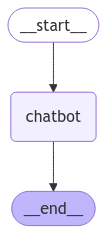

In [0]:
graph

In [0]:
response = graph.invoke({"messages": "Explain AI in 2 bullet points"})
response

{'messages': [HumanMessage(content='Explain AI in 2 bullet points', additional_kwargs={}, response_metadata={}, id='c67f2d3e-890b-470c-8b37-f61ec35eda92'),
  AIMessage(content='- **Definition**: Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, particularly computer systems, enabling them to perform tasks such as learning, reasoning, problem-solving, and understanding natural language.\n\n- **Applications**: AI is utilized across various fields, including healthcare (diagnosis and treatment recommendations), finance (fraud detection and algorithmic trading), autonomous vehicles, customer service (chatbots), and many more, enhancing efficiency and decision-making.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 95, 'prompt_tokens': 14, 'total_tokens': 109, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0},

In [0]:
response['messages']

[HumanMessage(content='Explain AI in 2 bullet points', additional_kwargs={}, response_metadata={}, id='c67f2d3e-890b-470c-8b37-f61ec35eda92'),
 AIMessage(content='- **Definition**: Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, particularly computer systems, enabling them to perform tasks such as learning, reasoning, problem-solving, and understanding natural language.\n\n- **Applications**: AI is utilized across various fields, including healthcare (diagnosis and treatment recommendations), finance (fraud detection and algorithmic trading), autonomous vehicles, customer service (chatbots), and many more, enhancing efficiency and decision-making.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 95, 'prompt_tokens': 14, 'total_tokens': 109, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_token

In [0]:
print(response['messages'][-1].content)

- **Definition**: Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, particularly computer systems, enabling them to perform tasks such as learning, reasoning, problem-solving, and understanding natural language.

- **Applications**: AI is utilized across various fields, including healthcare (diagnosis and treatment recommendations), finance (fraud detection and algorithmic trading), autonomous vehicles, customer service (chatbots), and many more, enhancing efficiency and decision-making.


## Invoking vs. Streaming in LangGraph

In [0]:
response = graph.invoke({"messages": "Explain AI in 1 line to a child"})
print(response['messages'][-1].content)

AI is like a smart robot that can learn and help us solve problems or answer questions!


In [0]:
response = graph.invoke({"messages": "What did we discuss so far?"})
print(response['messages'][-1].content)

I don't have access to previous conversations or any context from earlier interactions. Each session is treated independently. If you could provide some details or context about what we discussed, I'd be happy to help you with that!


In [0]:
for event in graph.stream({"messages": "Explain AI in 1 line to a child"},
                          stream_mode='values'):
    print(event['messages'])

[HumanMessage(content='Explain AI in 1 line to a child', additional_kwargs={}, response_metadata={}, id='f1b29dee-c3b3-4311-81cb-2bbf28d1ed59')]
[HumanMessage(content='Explain AI in 1 line to a child', additional_kwargs={}, response_metadata={}, id='f1b29dee-c3b3-4311-81cb-2bbf28d1ed59'), AIMessage(content='AI is like a smart robot that can learn and help us solve problems or answer questions!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 16, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_7fcd609668', 'finish_reason': 'stop', 'logprobs': None}, id='run-5af98eec-0731-47be-a5c1-a8bd888a8f59-0', usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_t

In [0]:
for event in graph.stream({"messages": "Explain AI in 1 line to a child"},
                          stream_mode='updates'):
    print(event)

{'chatbot': {'messages': [AIMessage(content='AI is like a smart robot that can learn and help us solve problems or answer questions!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 16, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_7fcd609668', 'finish_reason': 'stop', 'logprobs': None}, id='run-8baa184e-cca4-4a8c-b76d-a7da044e098a-0', usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
